<a href="https://colab.research.google.com/github/akanksha-y/Data-Science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfs=pd.read_csv('/content/Titanic_test.csv')
dfr=pd.read_csv('/content/Titanic_train.csv')

In [ ]:
dfr.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dfs.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dfs.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
dfr.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dfs.describe()#summary stats of a test dataset

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
dfr.describe()#summary stats of training data set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dfs.select_dtypes('object').value_counts()

,,,,,count
Name,Sex,Ticket,Cabin,Embarked,
"Abelseth, Mr. Olaus Jorgensen",male,348122,F G63,S,1
"Ryerson, Master. John Borie",male,PC 17608,B57 B59 B63 B66,C,1
"Payne, Mr. Vivian Ponsonby",male,12749,B24,S,1
"Ovies y Rodriguez, Mr. Servando",male,PC 17562,D43,C,1
"Ostby, Miss. Helene Ragnhild",female,113509,B36,C,1
...,...,...,...,...,...
"Dodge, Mrs. Washington (Ruth Vidaver)",female,33638,A34,S,1
"Dodge, Dr. Washington",male,33638,A34,S,1
"Davidson, Mrs. Thornton (Orian Hays)",female,F.C. 12750,B71,S,1


In [ ]:
#EDA
dfs.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
dfr.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
dfs.duplicated().sum()

0

In [ ]:
dfr.duplicated().sum()

0

# visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


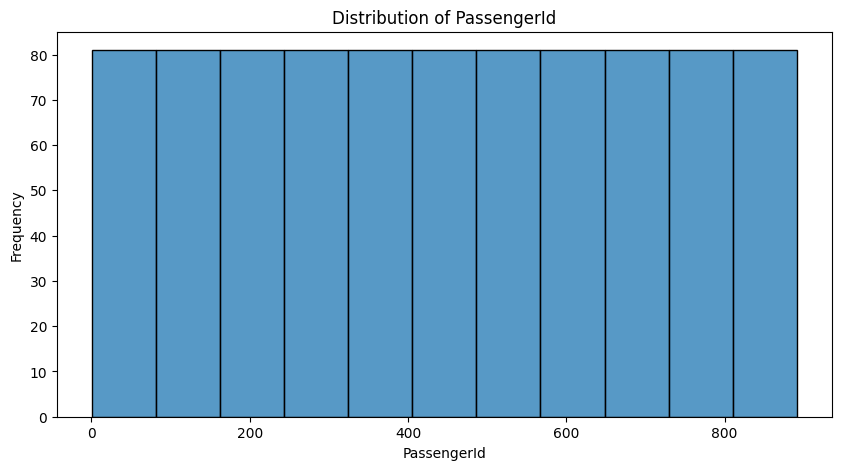

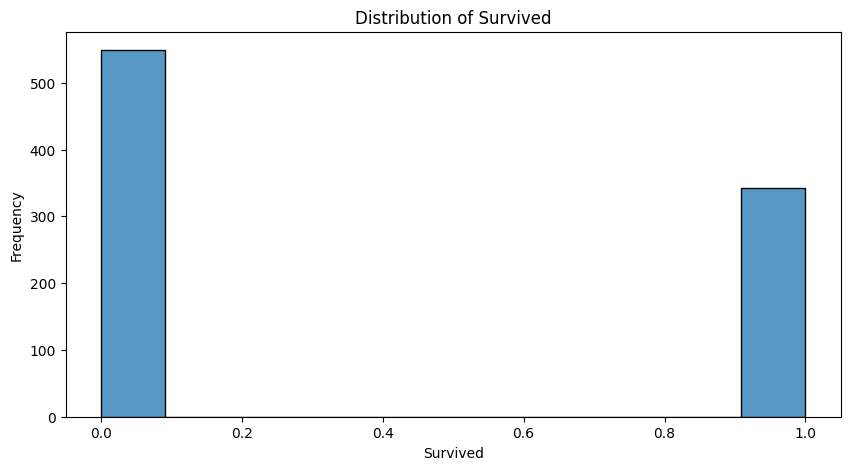

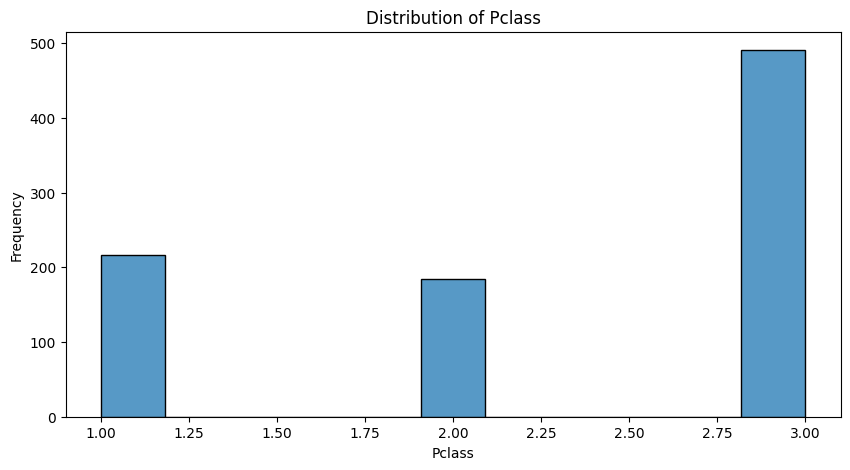

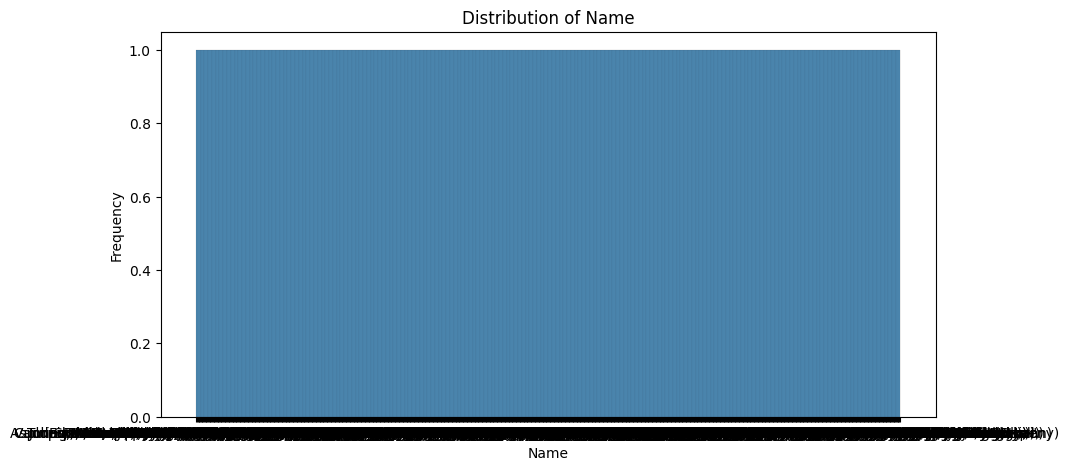

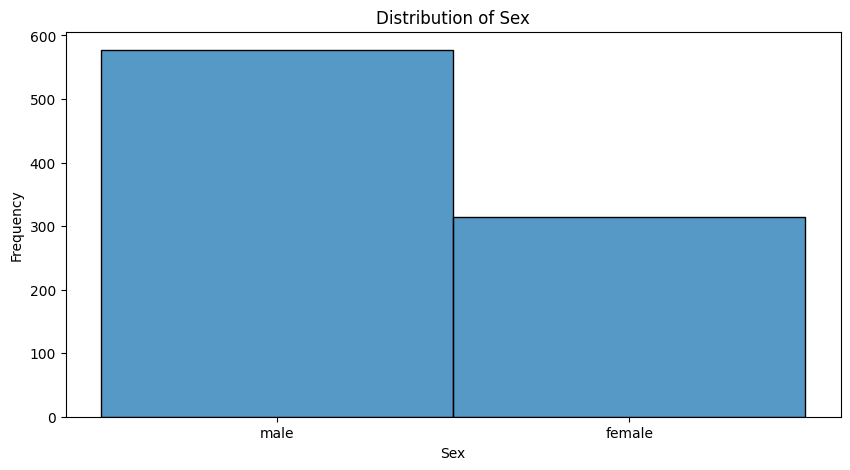

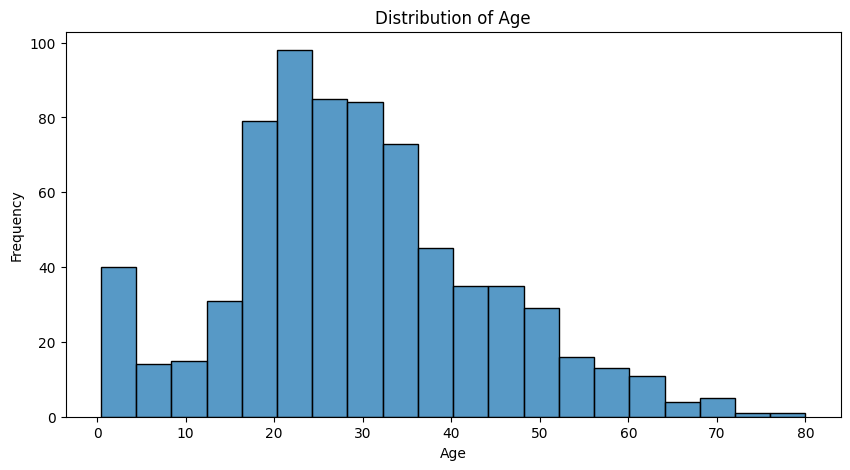

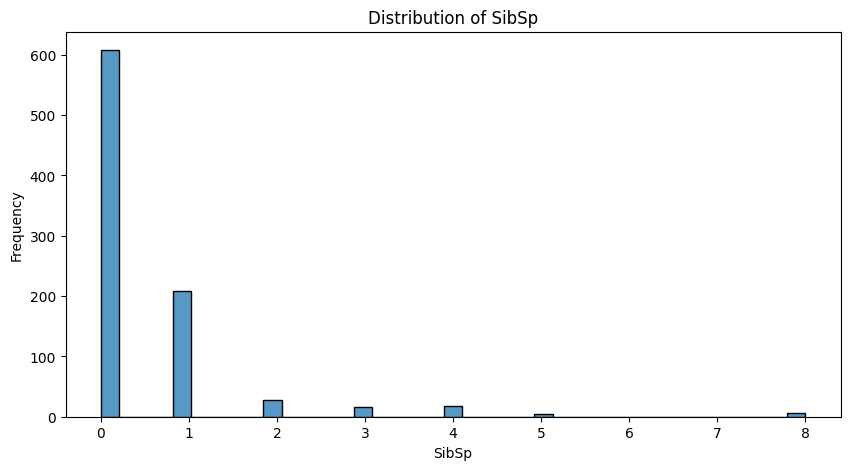

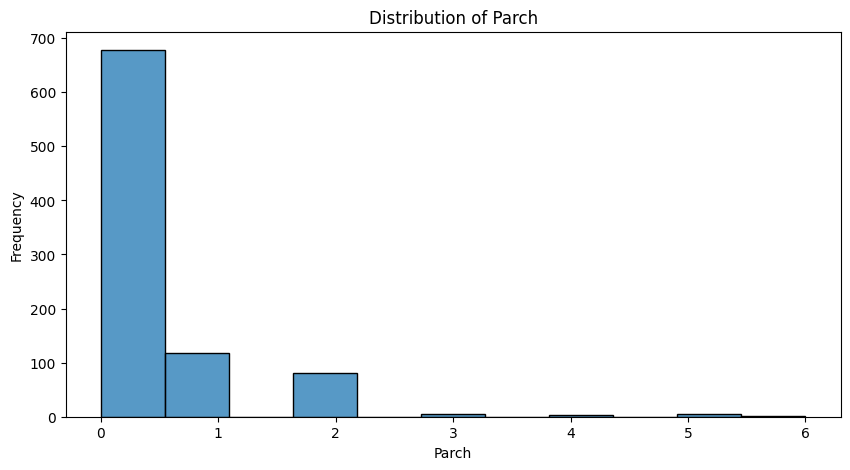

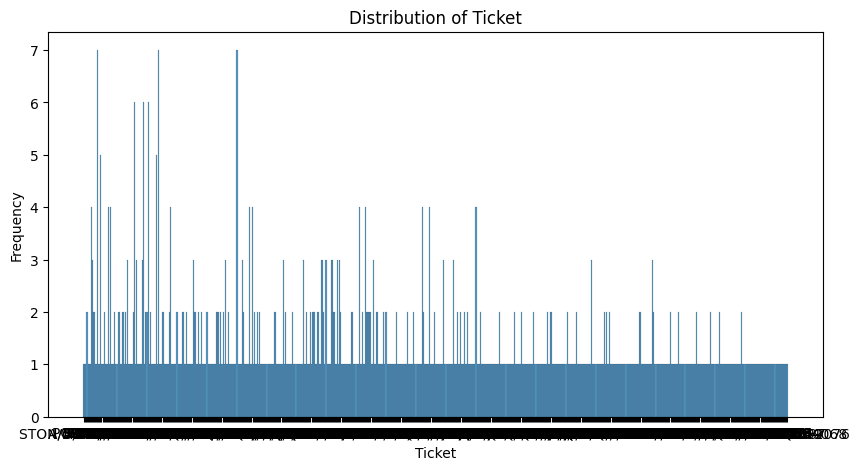

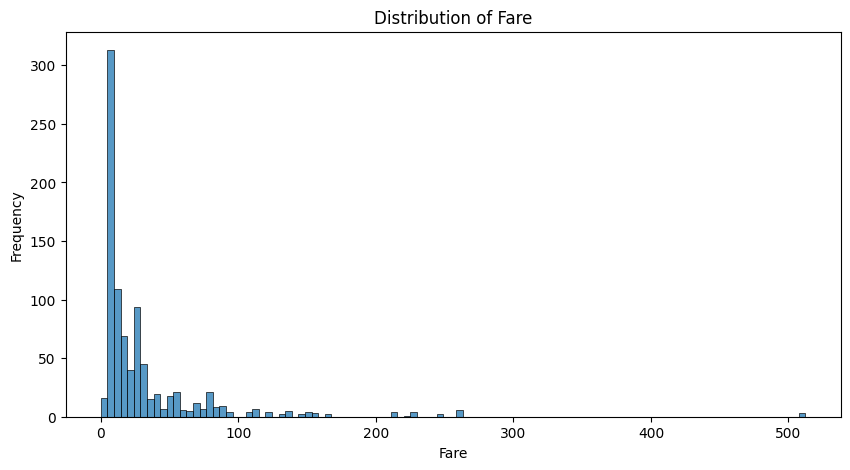

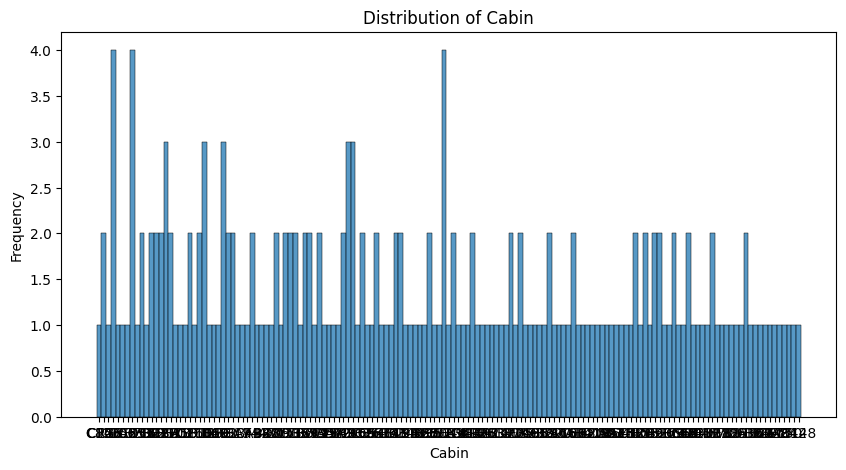

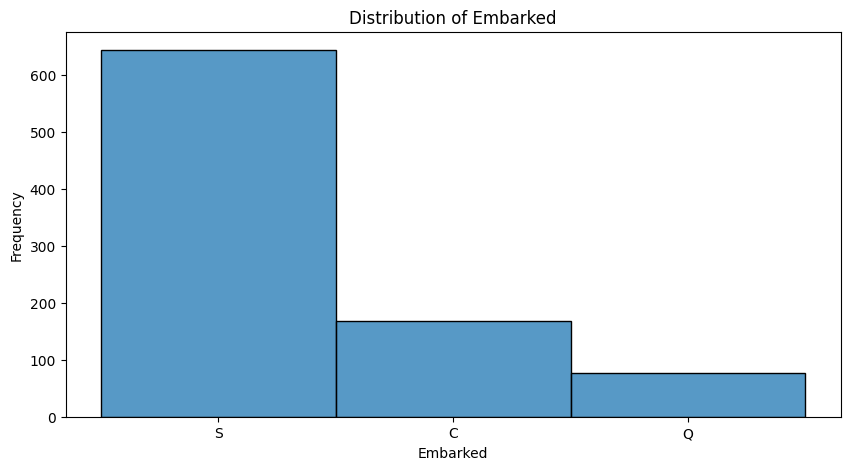

In [ ]:
#histogram of train data
for i in dfr.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(dfr[i])
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {i}')
  plt.show()

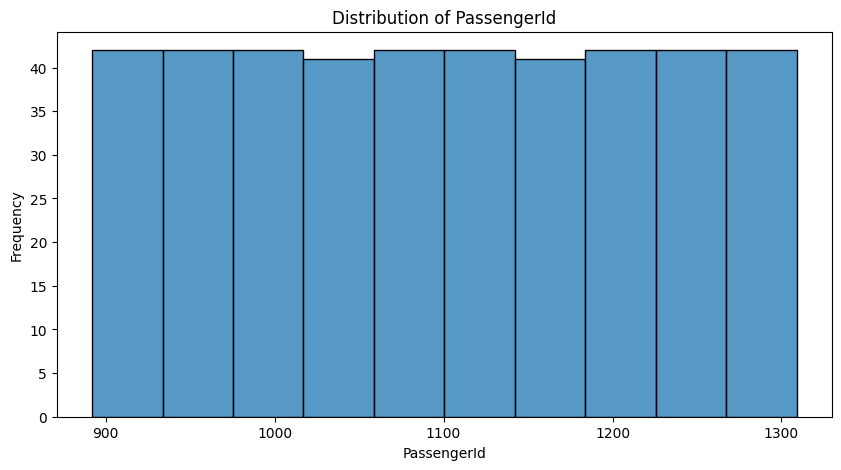

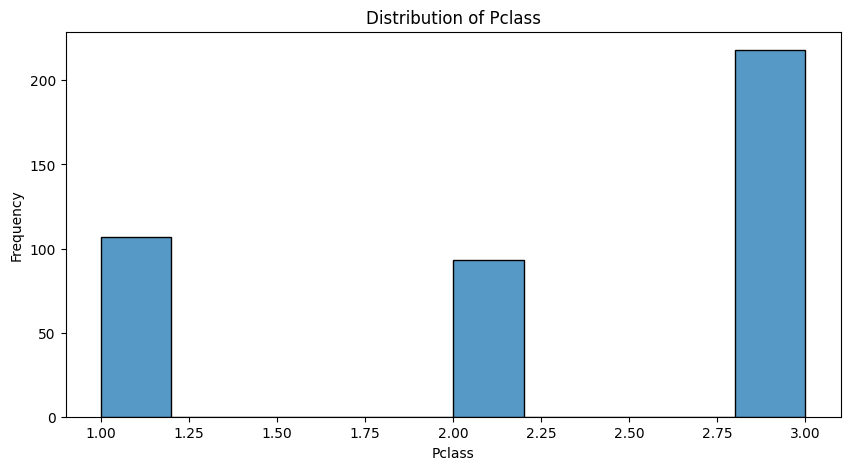

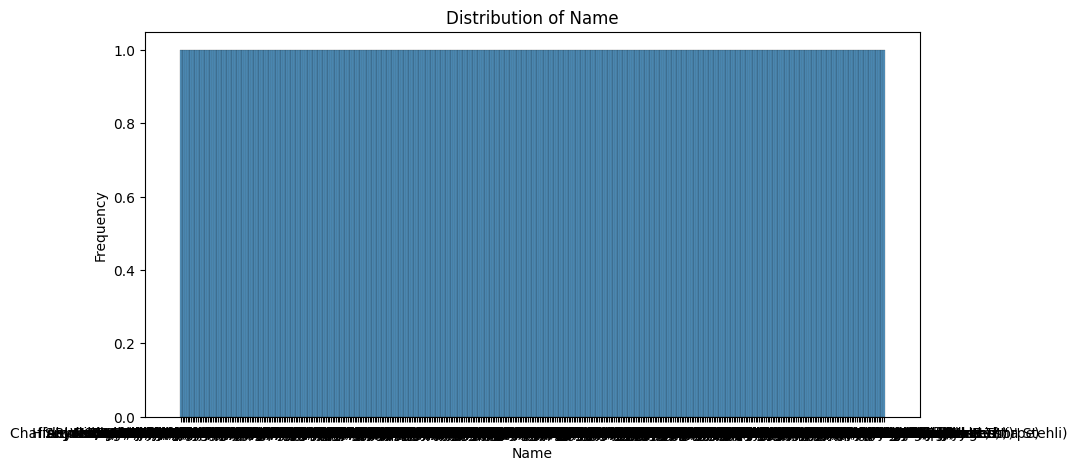

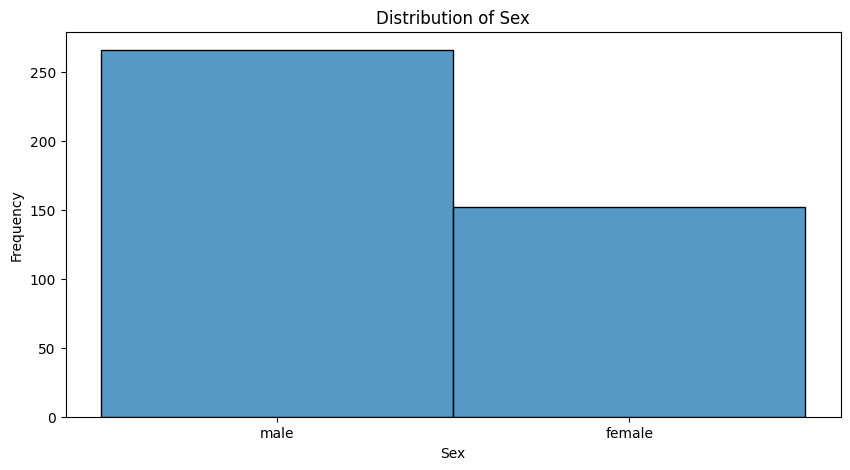

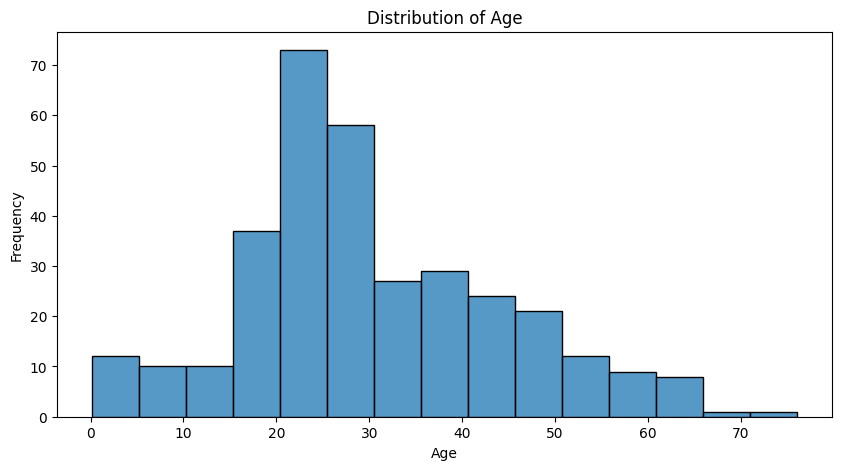

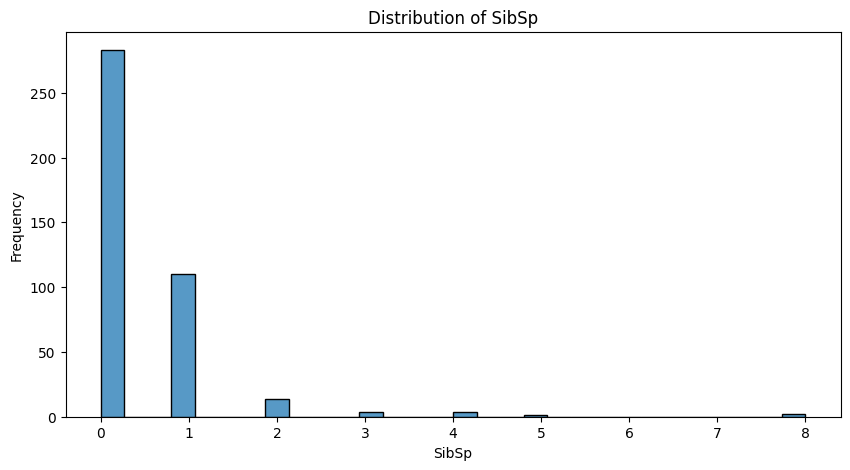

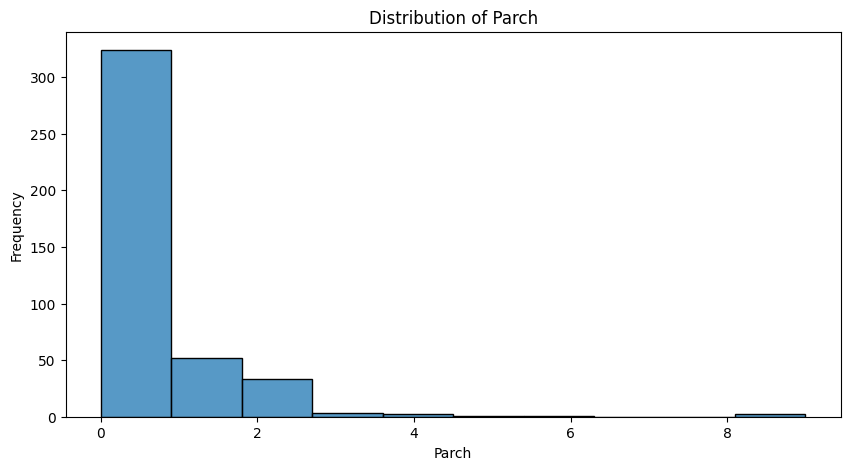

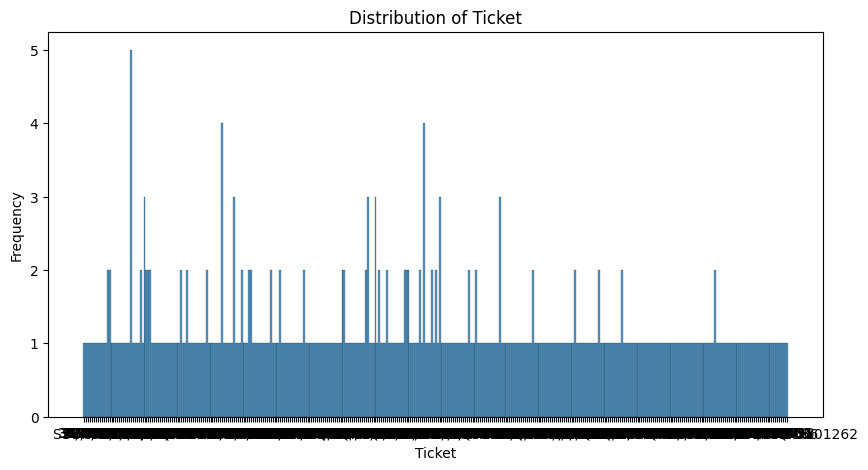

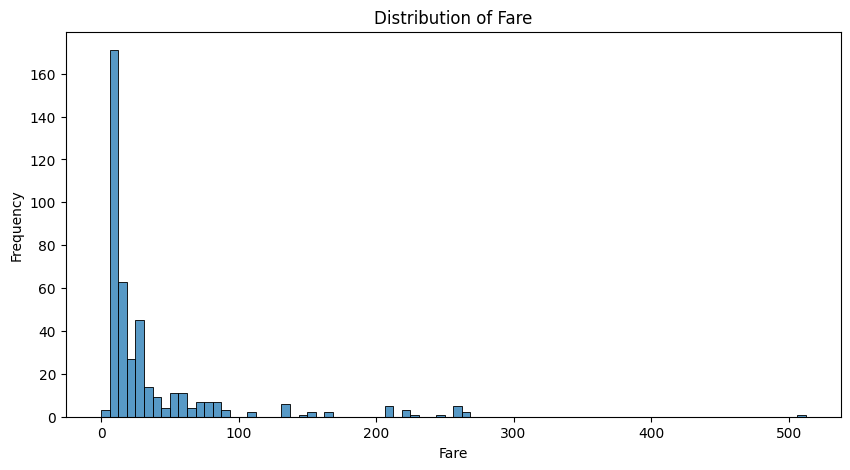

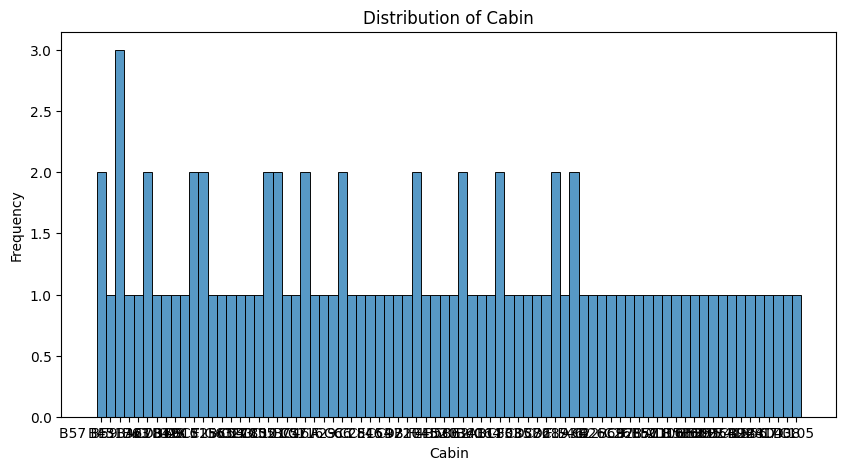

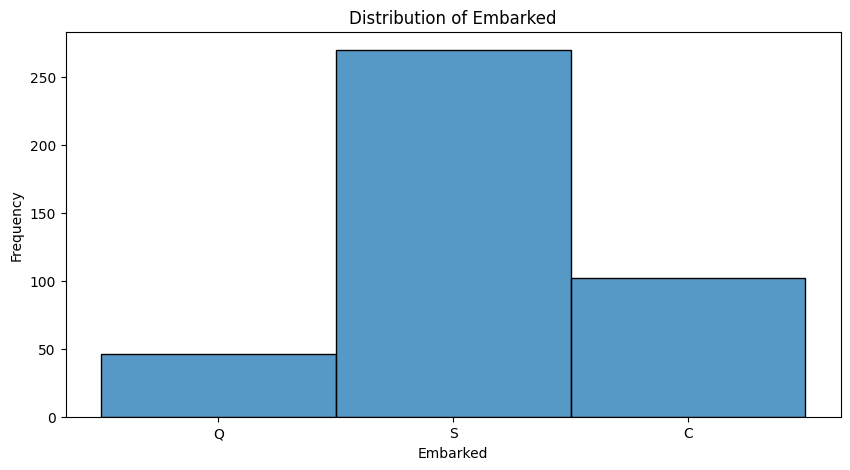

In [ ]:
#histogram of tesst dataset
for i in dfs.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(dfs[i])
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {i}')
  plt.show()

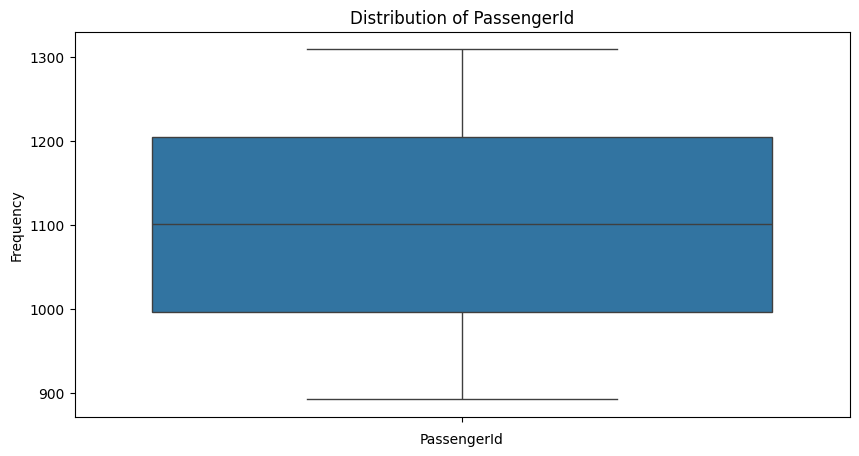

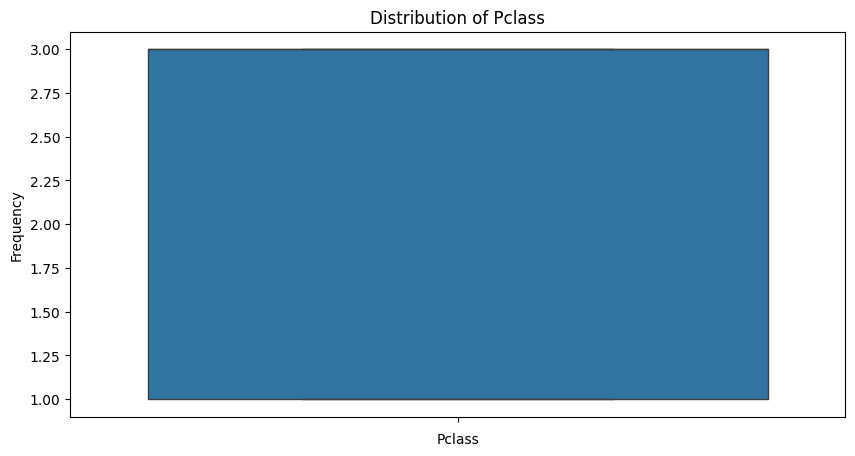

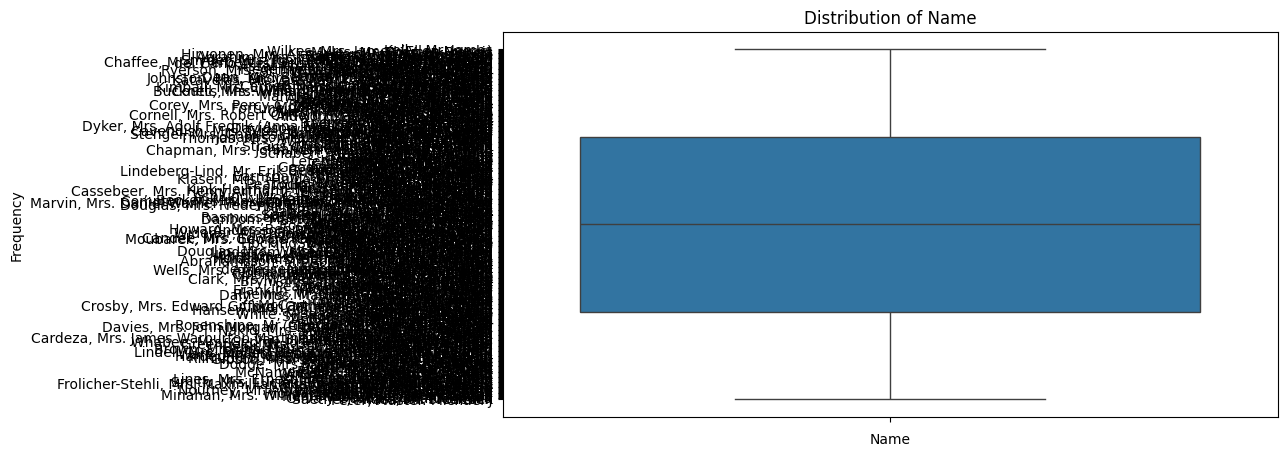

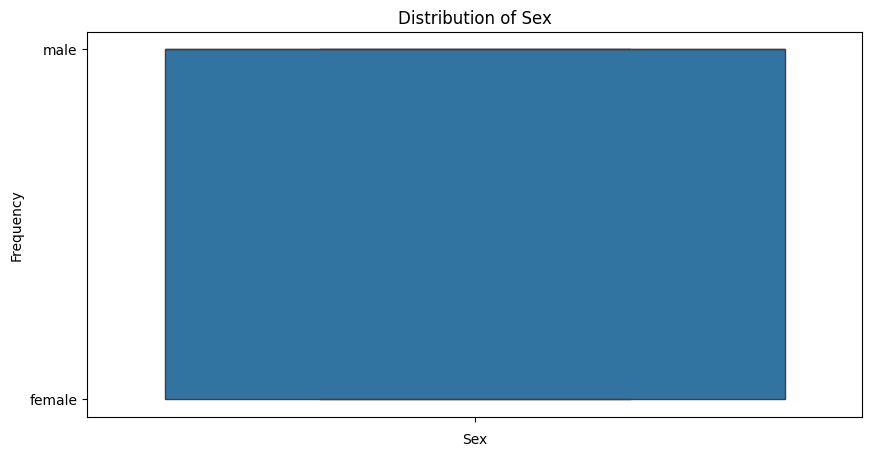

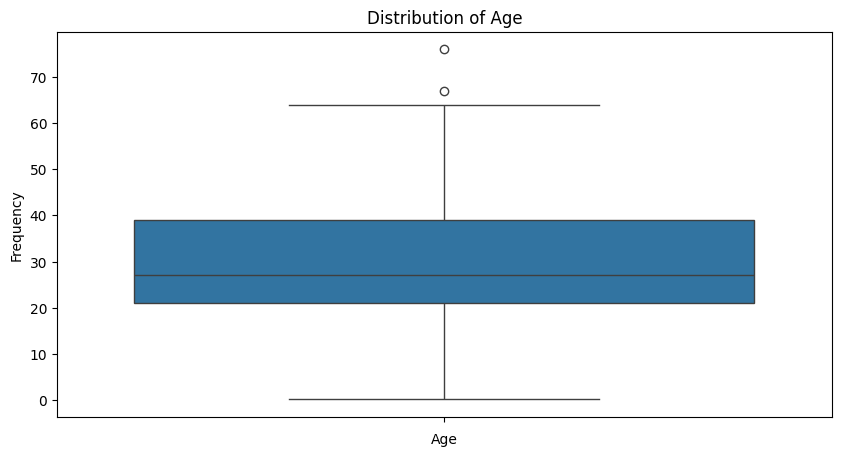

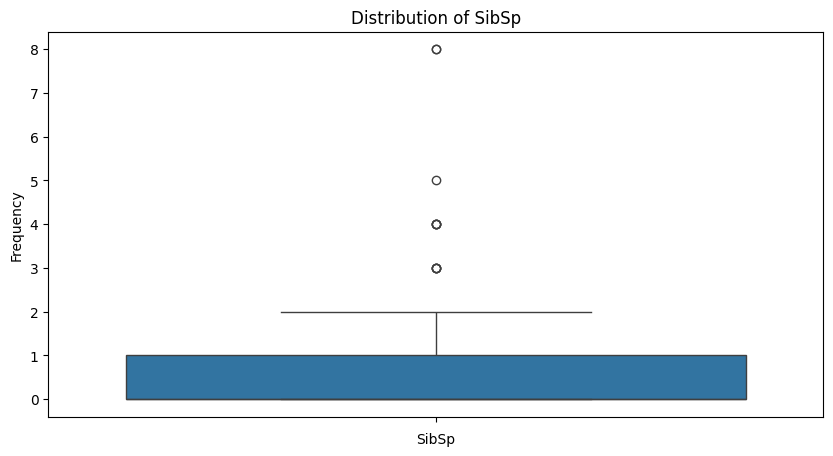

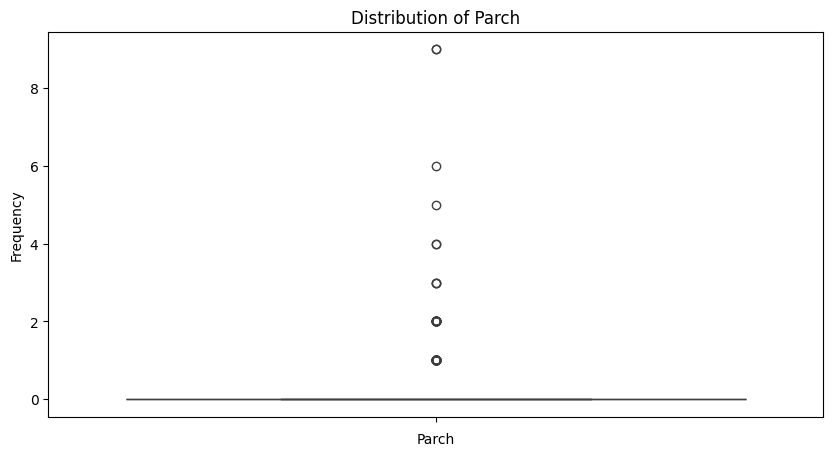

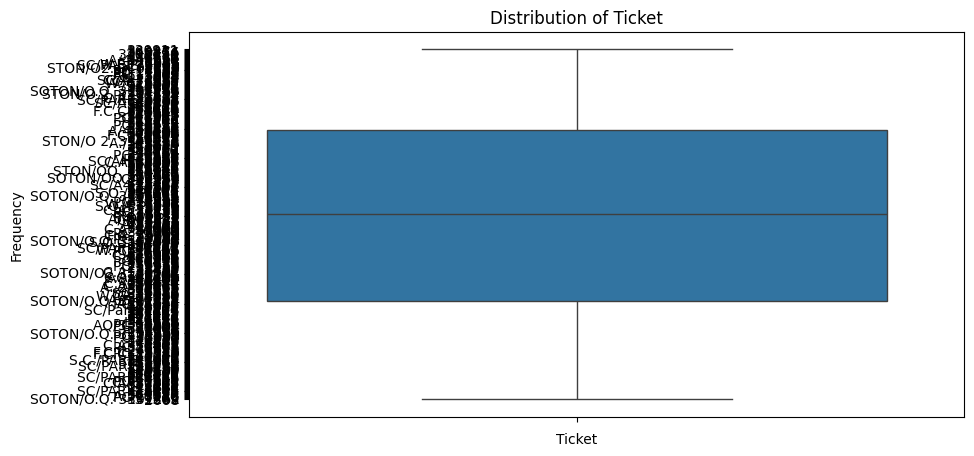

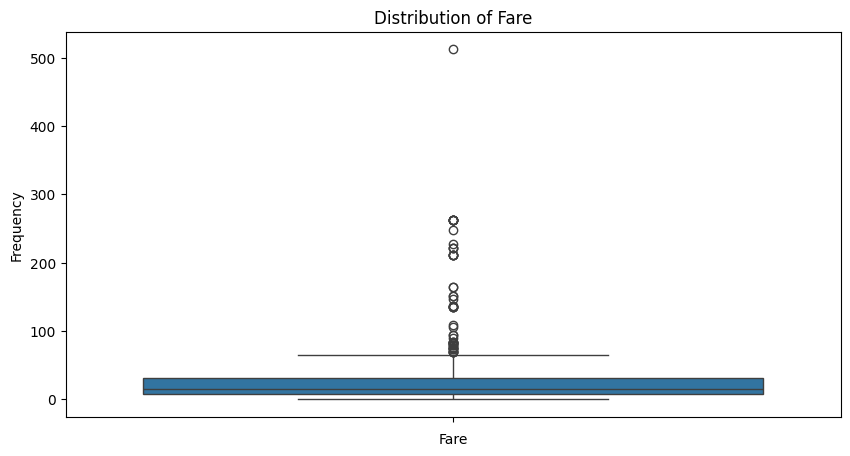

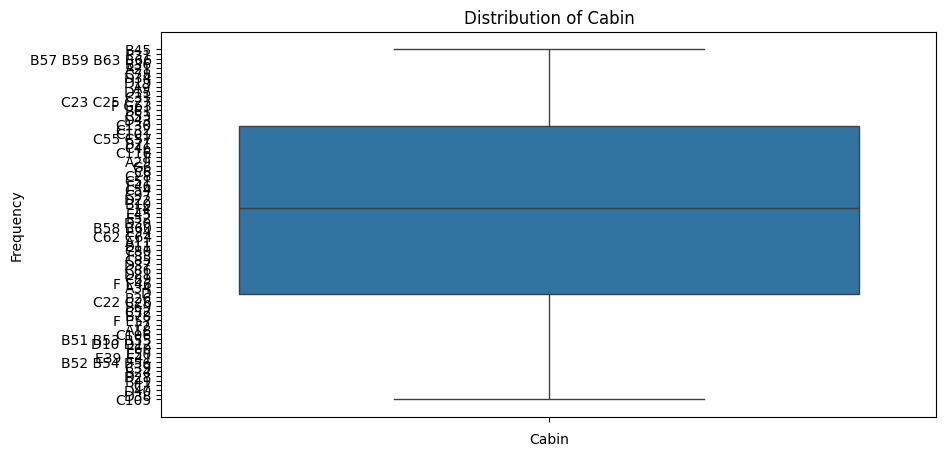

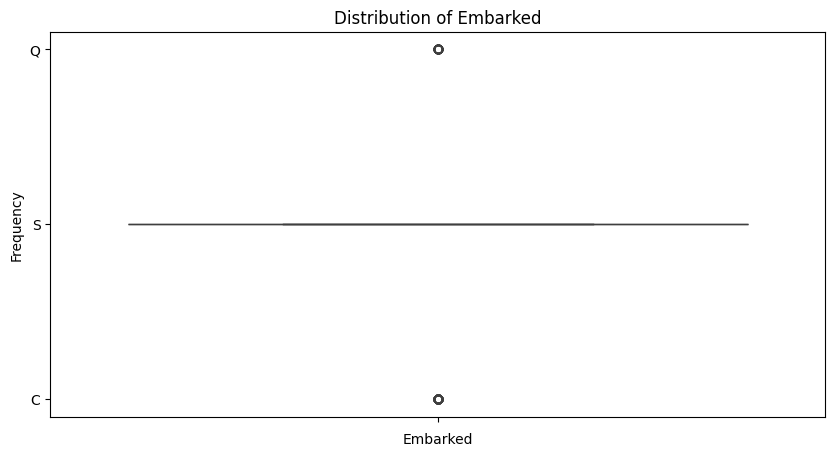

In [ ]:
#boxplot of test data set
for i in dfs.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(dfs[i])
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {i}')
  plt.show()

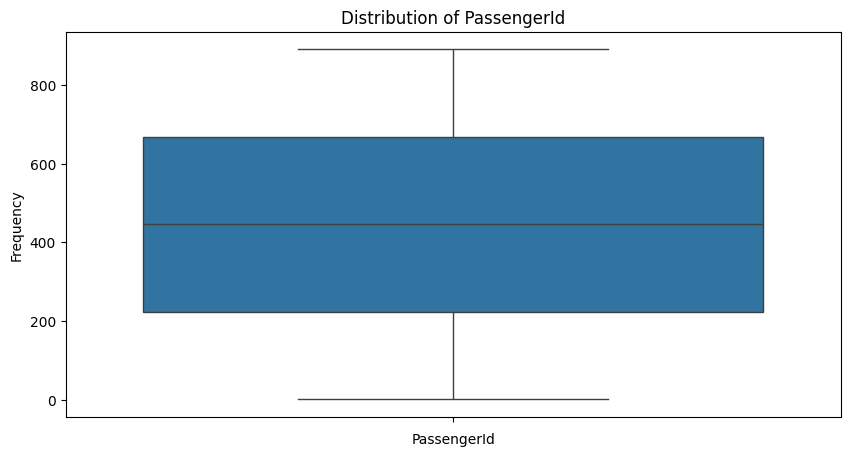

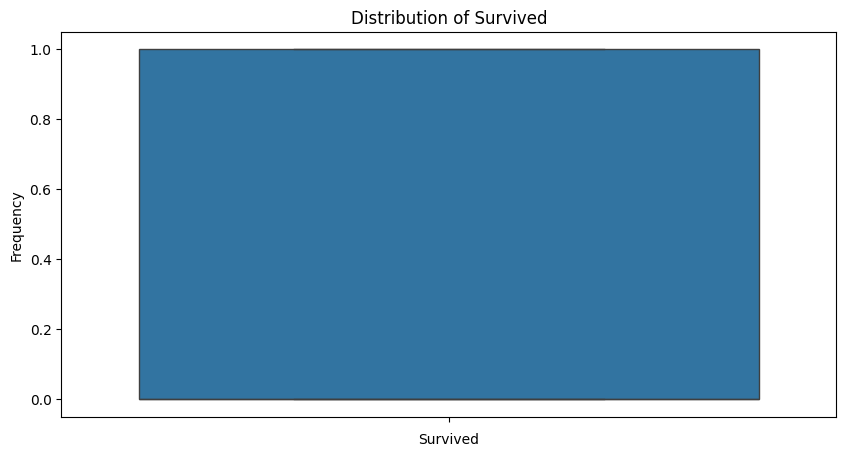

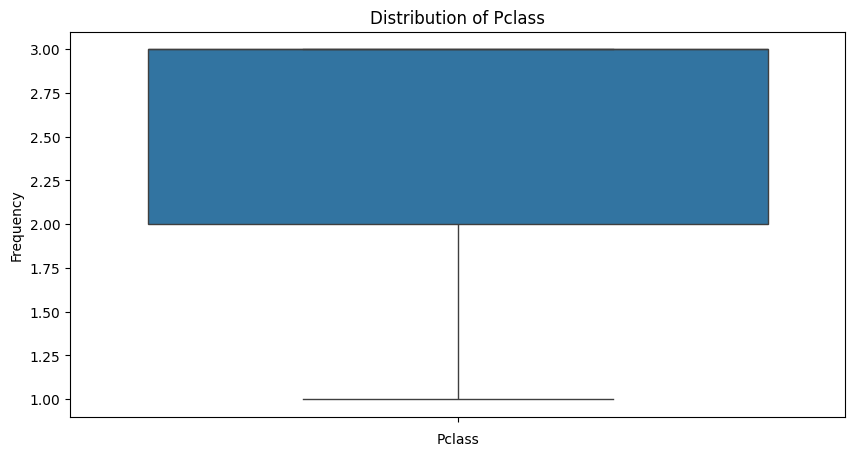

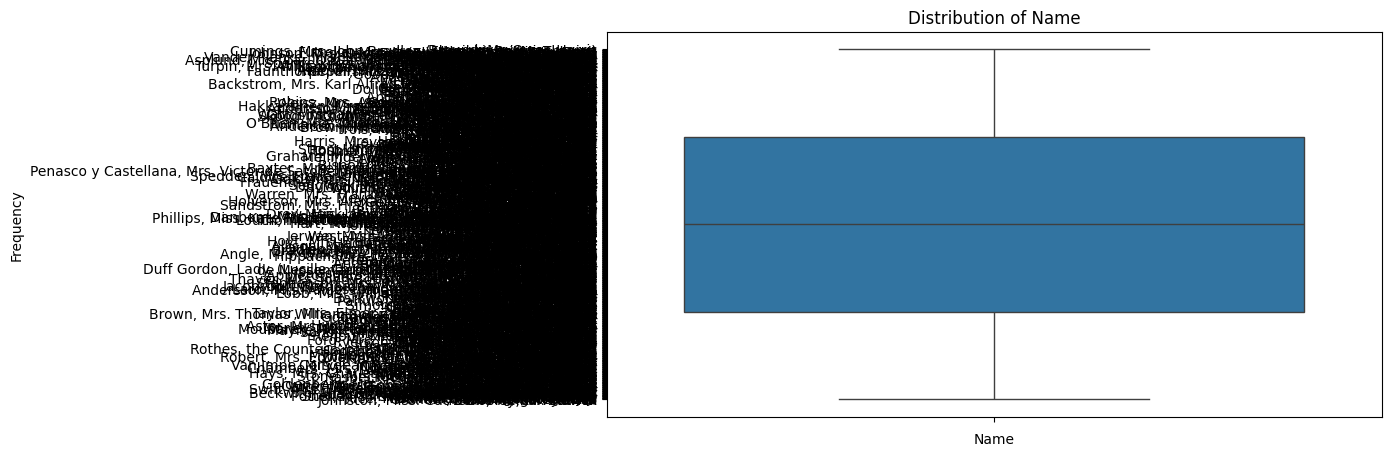

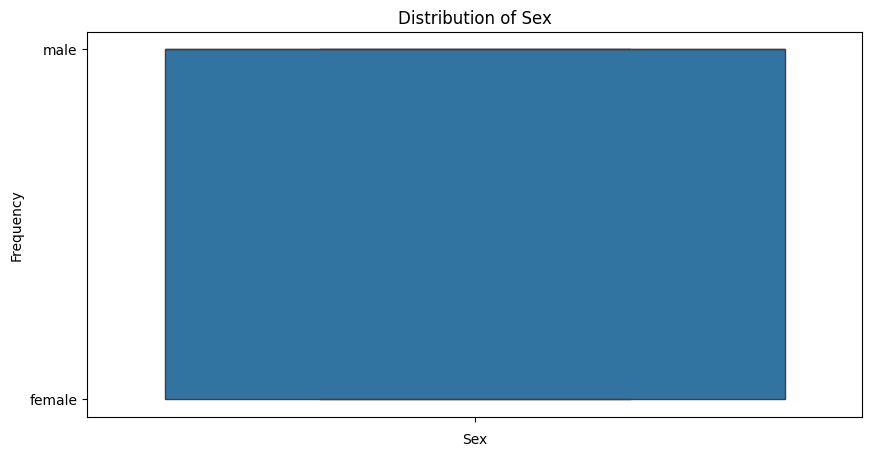

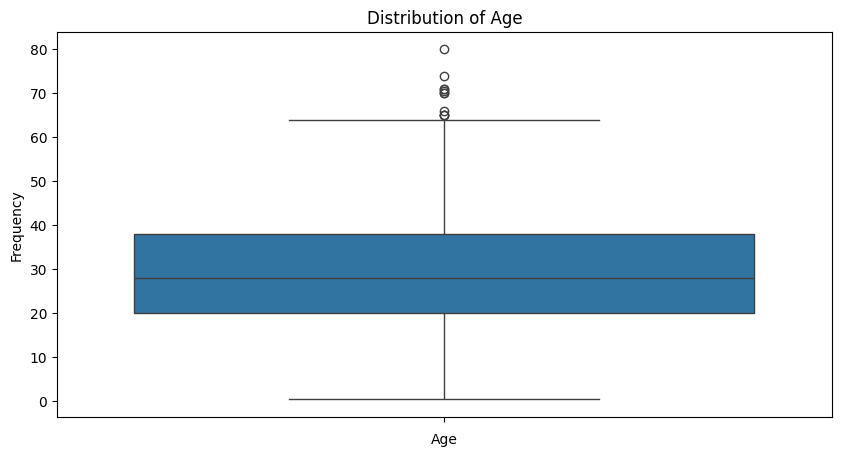

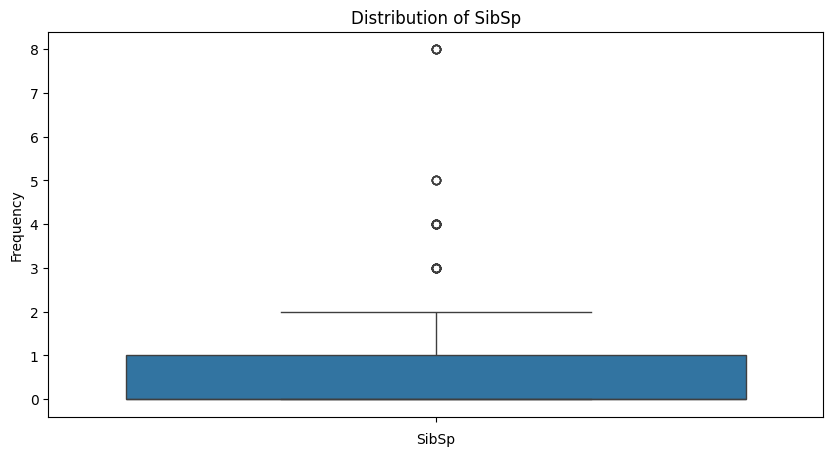

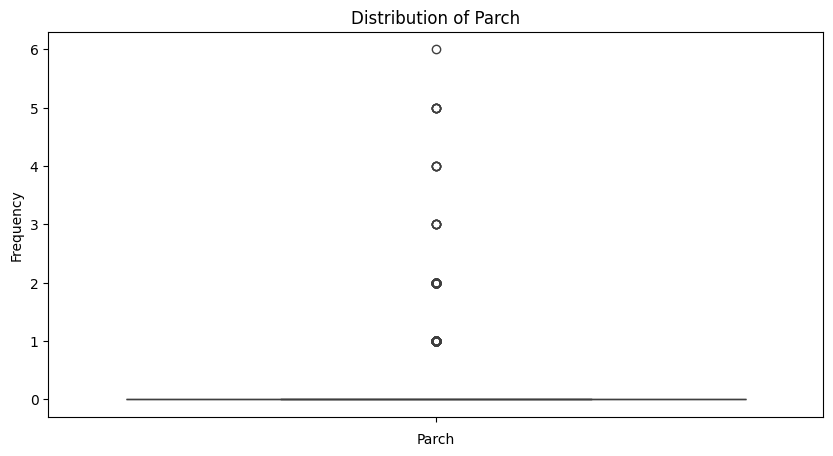

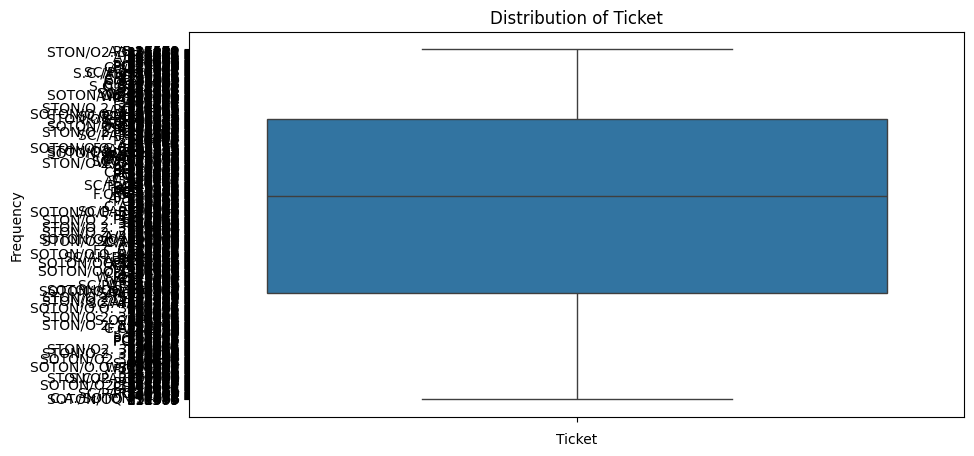

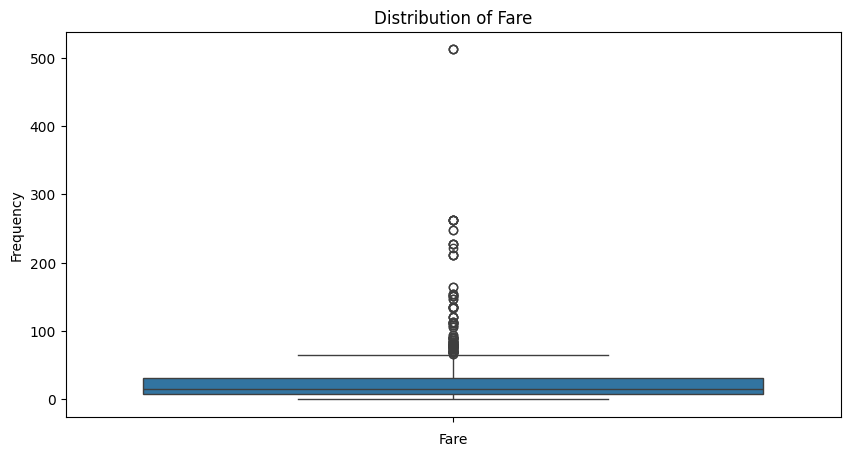

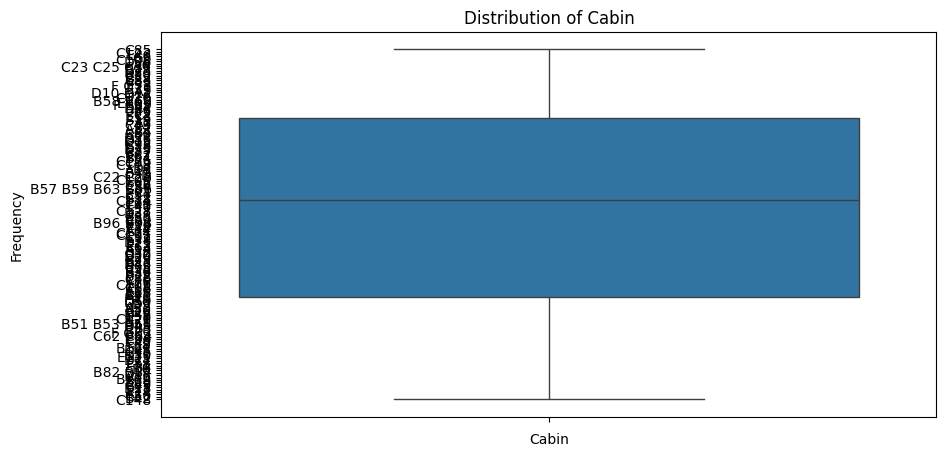

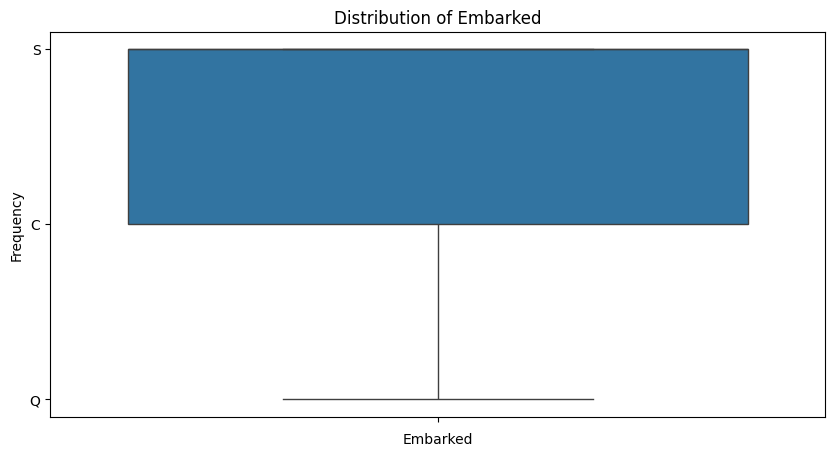

In [ ]:
#boxplot of training dataset
for i in dfr.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(dfr[i])
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {i}')
  plt.show()

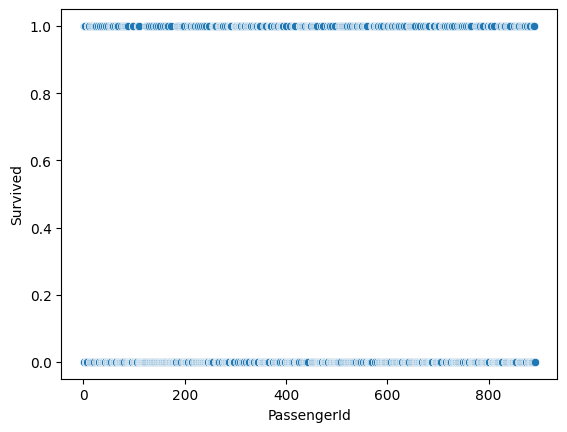

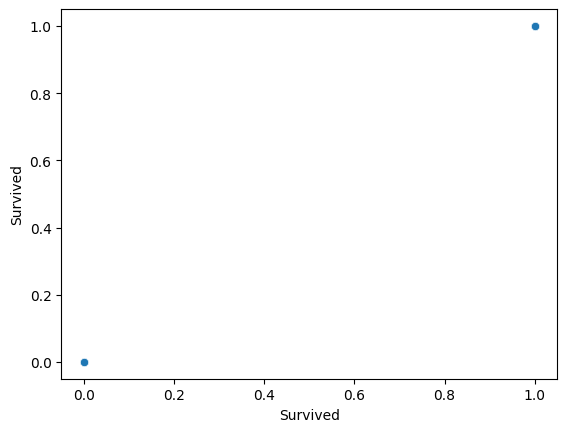

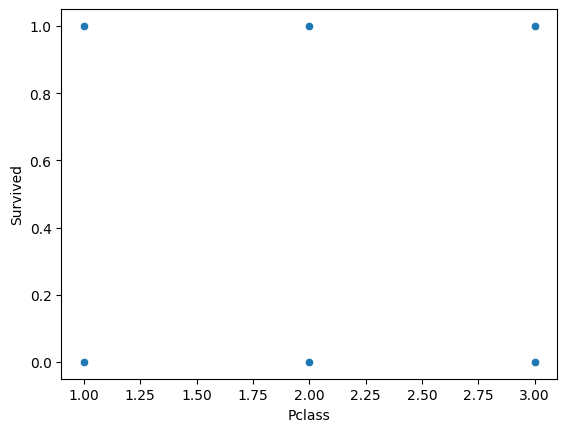

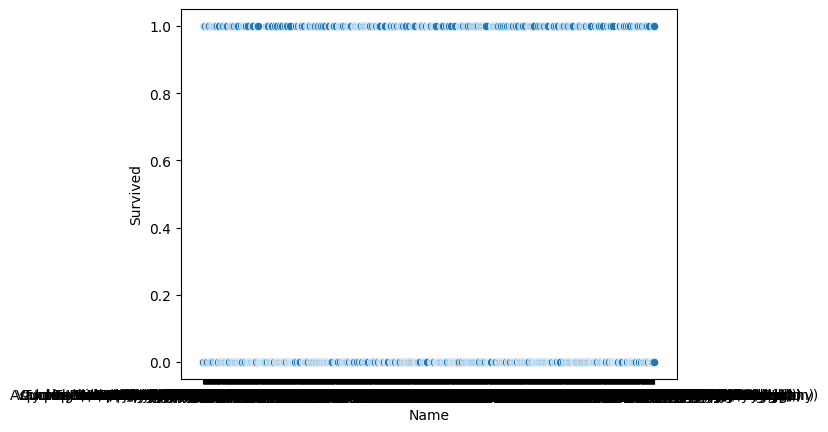

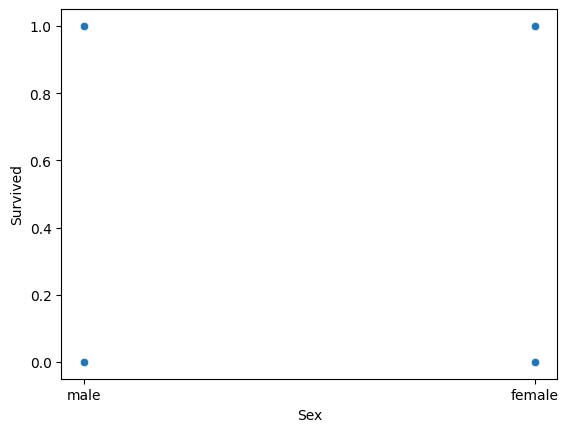

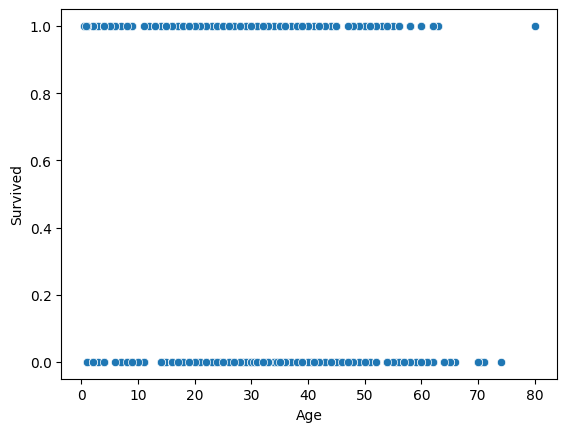

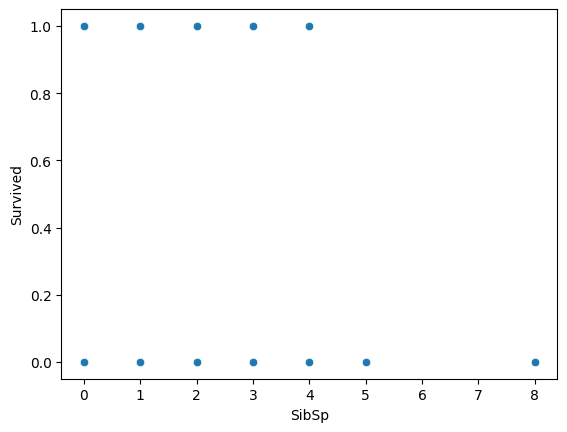

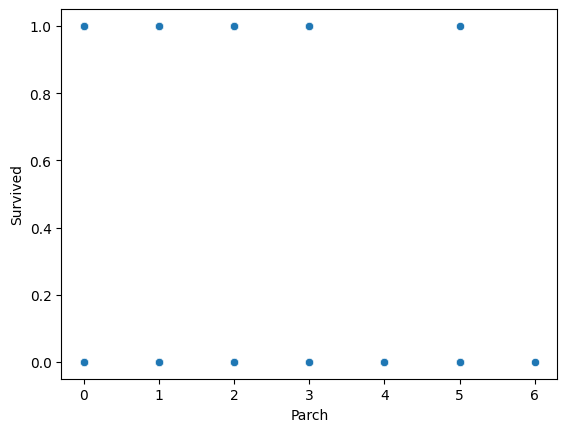

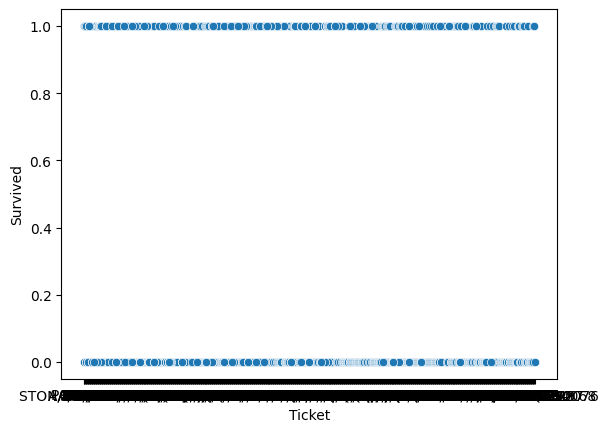

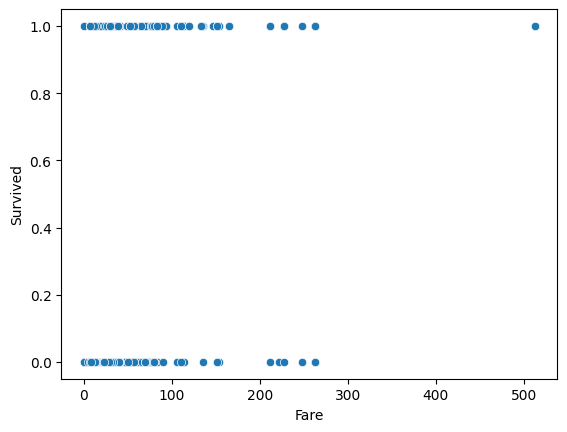

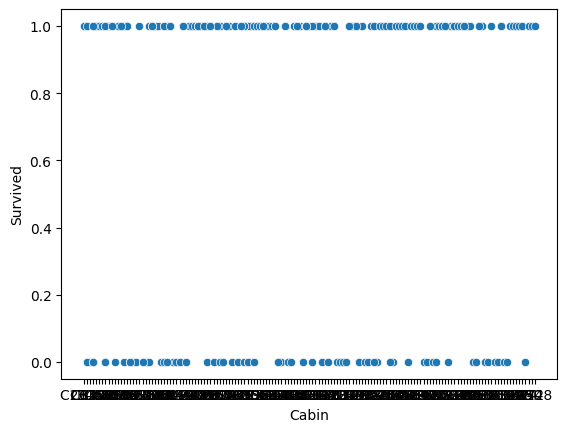

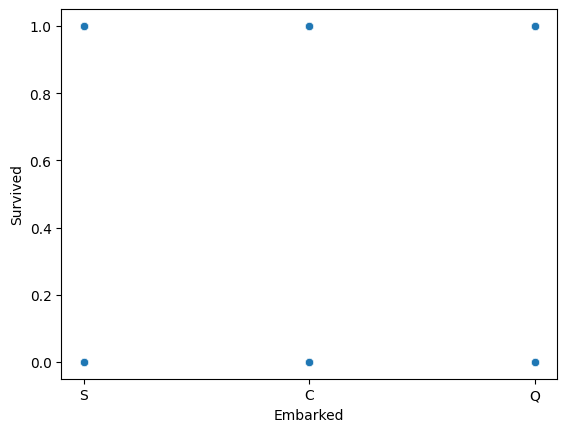

In [ ]:
for i in dfr.columns:
  sns.scatterplot(x=dfr[i],y=dfr['Survived'])
  plt.show()

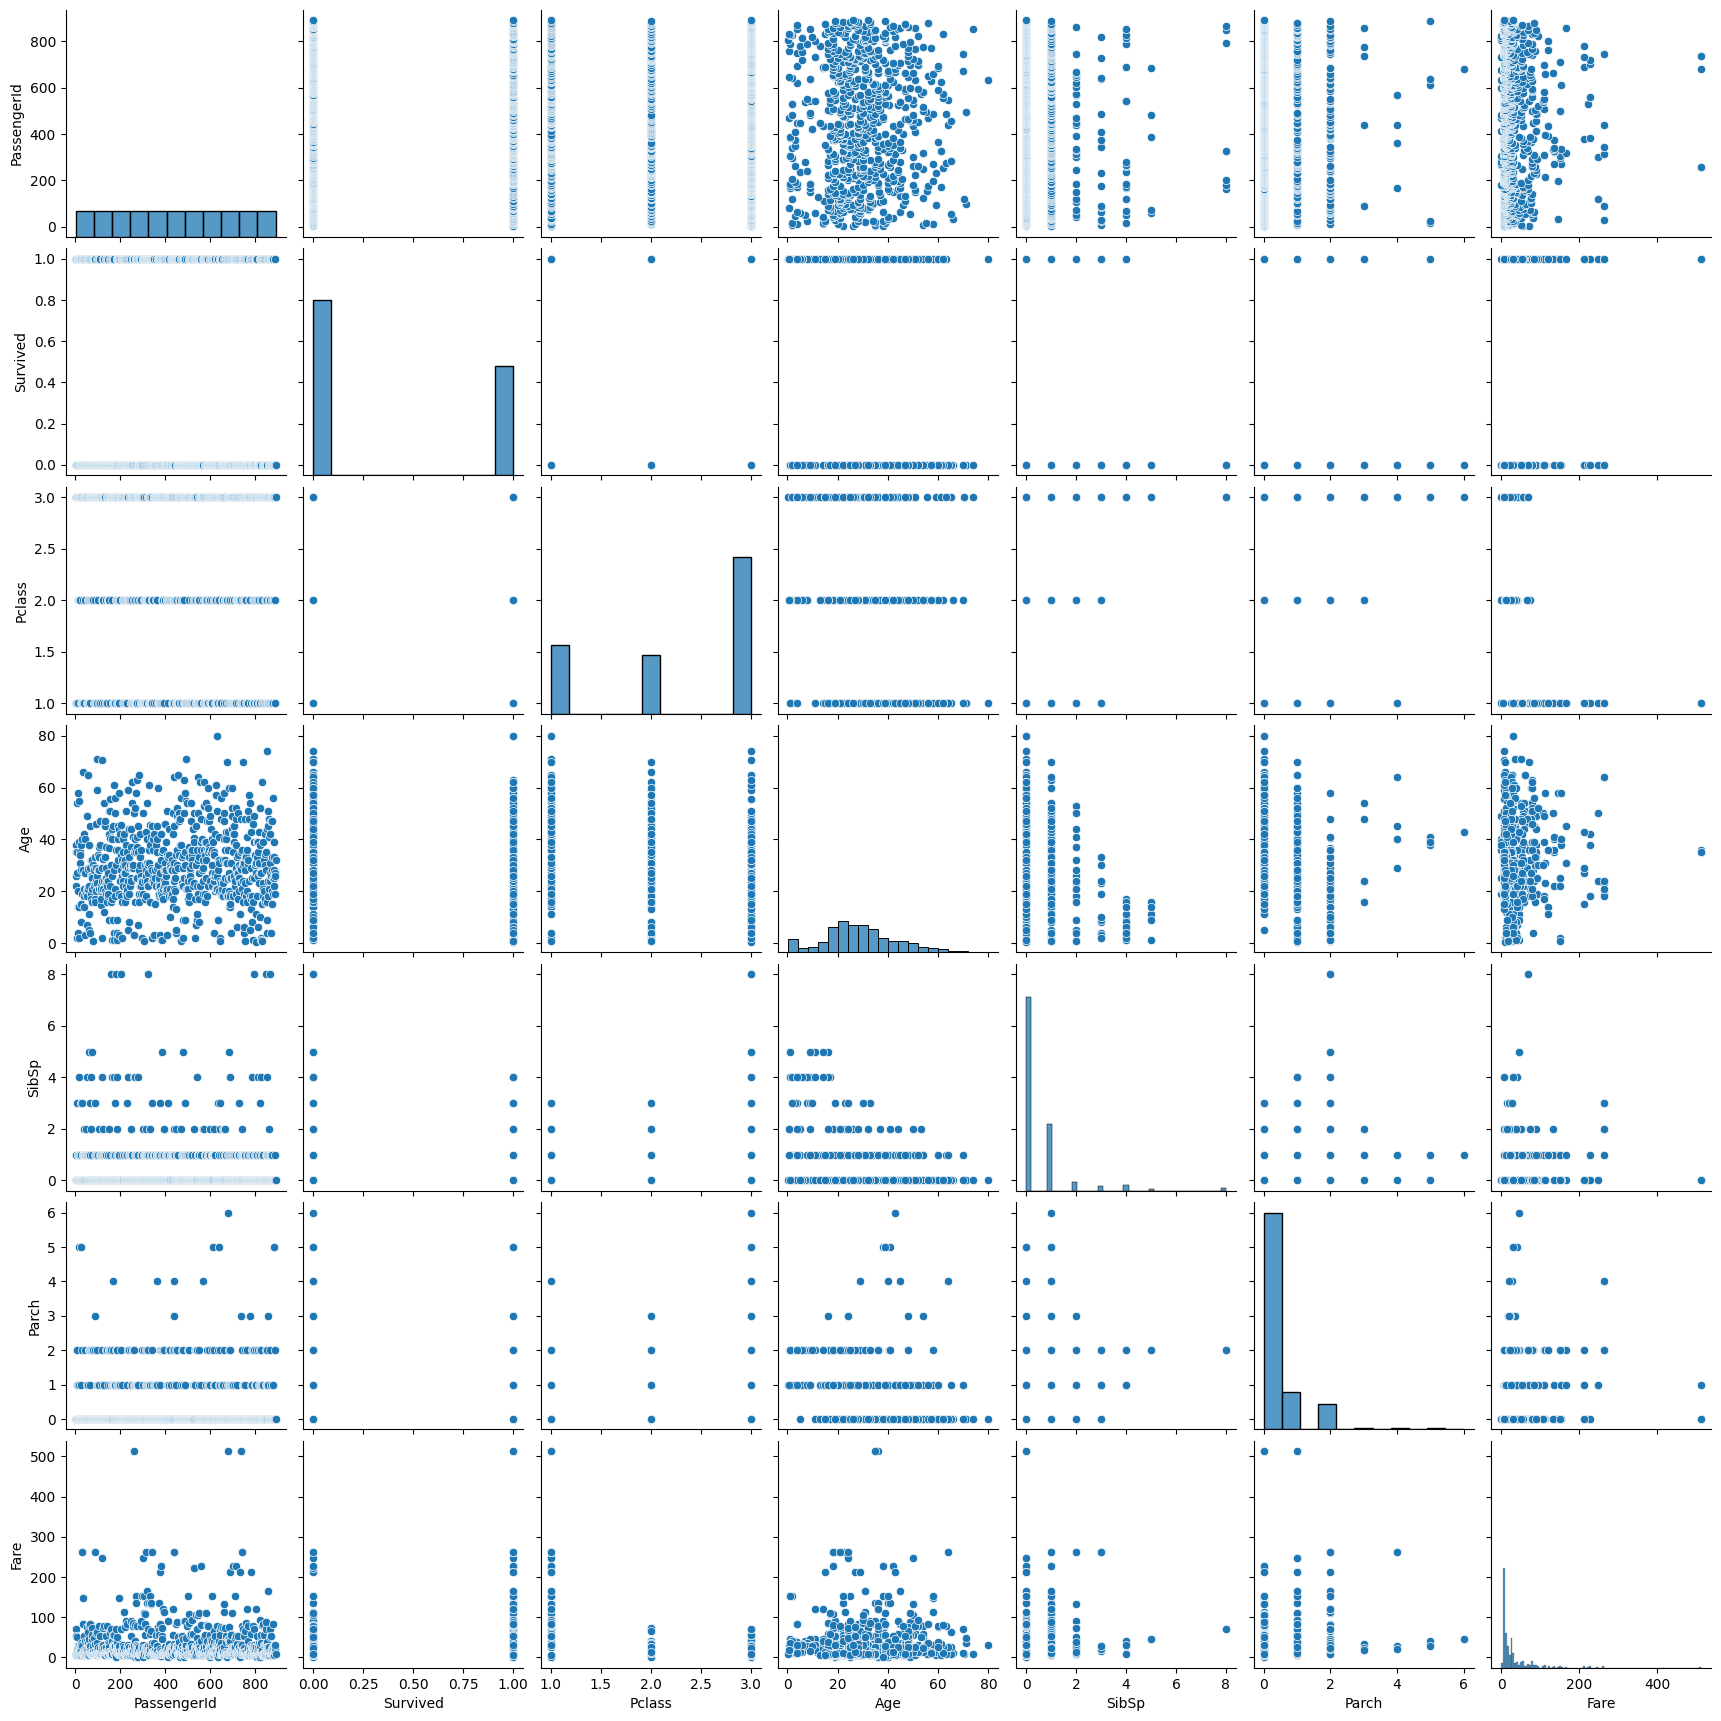

In [ ]:
sns.pairplot(dfr)
plt.show()

In [ ]:
dfr.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


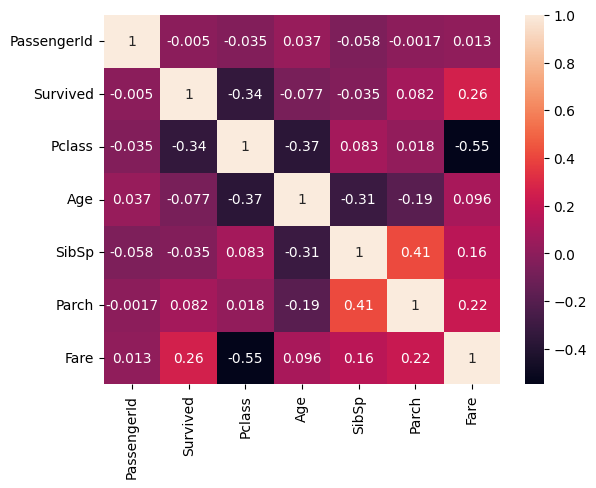

In [ ]:
#heatmap of train dataset
sns.heatmap(dfr.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
dfs.corr(numeric_only=True)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


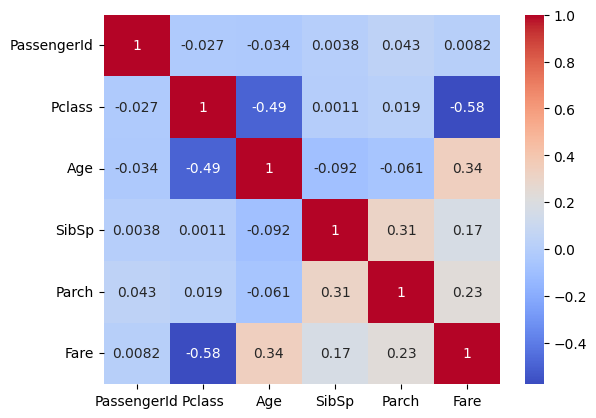

In [ ]:
#heatmap of test data
sns.heatmap(dfs.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

# handling of missing values

In [ ]:
dfs.fillna(value=dfs.mean(numeric_only=True),inplace=True)


In [ ]:
dfs.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [ ]:
dfr.fillna(value=dfr.mean(numeric_only=True),inplace=True)

In [ ]:
dfr.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
dfr.fillna(value=dfr.mode().iloc[0],inplace=True)

In [ ]:
dfr.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# encoding of categorical values

In [ ]:
dfr_encoded=pd.get_dummies(dfr,columns=dfr.select_dtypes('object').columns)
dfs_encoded=pd.get_dummies(dfs,columns=dfs.select_dtypes('object').columns)


In [ ]:

dfs_encoded.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Master. Eugene Joseph","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes",...,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,893,3,47.0,1,0,7.0000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,894,2,62.0,0,0,9.6875,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,895,3,27.0,0,0,8.6625,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,896,3,22.0,1,1,12.2875,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:

dfr_encoded.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Building Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
x=dfr_encoded.drop('Survived',axis=1)
y=dfr_encoded['Survived']

In [ ]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,38.000000,1,0,71.2833,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,3,26.000000,0,0,7.9250,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,35.000000,1,0,53.1000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,3,35.000000,0,0,8.0500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
887,888,1,19.000000,0,0,30.0000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
888,889,3,29.699118,1,2,23.4500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
889,890,1,26.000000,0,0,30.0000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
df=LogisticRegression()
df.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=df.predict(x)

In [ ]:
#Accuracy score train data set
df.score(x,y)

0.8282828282828283

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
df_ap=pd.DataFrame({'Actual_values':y,'Predicted_values':y_pred})

In [ ]:
df_ap

,Actual_values,Predicted_values
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [ ]:
#building model for the test data set
x1=dfs_encoded
y1 = y[:dfs_encoded.shape[0]] #so in test data set there is no target variable present so we use the training data set
#Training Dataset: This dataset contains the Survived column (the target variable) along with various features (independent variables).
#Testing Dataset: This dataset does not include the Survived column because you want to predict it. It only contains features.
#we used slicing to match with the test dataset

In [ ]:
df1=LogisticRegression()
df1.fit(x1,y1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y1_pred=df1.predict(x1)

In [ ]:
y1_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
x1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Master. Eugene Joseph","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes",...,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,893,3,47.00000,1,0,7.0000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,894,2,62.00000,0,0,9.6875,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,895,3,27.00000,0,0,8.6625,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,896,3,22.00000,1,1,12.2875,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
414,1306,1,39.00000,0,0,108.9000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
415,1307,3,38.50000,0,0,7.2500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
416,1308,3,30.27259,0,0,8.0500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df1.score(x1,y1)

0.9114832535885168

In [ ]:
df1_ap=pd.DataFrame({'Actual_values':y1,'Predicted_values':y1_pred})

In [ ]:
df1_ap

,Actual_values,Predicted_values
0,0,0
1,1,0
2,1,1
3,1,0
4,0,0
...,...,...
413,0,0
414,1,1
415,0,0
416,1,1


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
#precisoon, recall,f1-score,support values of test dataset
df1_cr=classification_report(y1,y1_pred,output_dict=True)
df1_cr=pd.DataFrame(df1_cr).transpose()
df1_cr

,precision,recall,f1-score,support
0,0.883803,0.984314,0.931354,255.000000
1,0.970149,0.797546,0.875421,163.000000
accuracy,0.911483,0.911483,0.911483,0.911483
macro avg,0.926976,0.890930,0.903388,418.000000
weighted avg,0.917474,0.911483,0.909543,418.000000


In [ ]:
#precisoon, recall,f1-score,support values of train dataset
df_cr=classification_report(y,y_pred,output_dict=True)
df_cr=pd.DataFrame(df_cr).transpose()
df_cr

,precision,recall,f1-score,support
0,0.846154,0.881603,0.863515,549.000000
1,0.796238,0.742690,0.768533,342.000000
accuracy,0.828283,0.828283,0.828283,0.828283
macro avg,0.821196,0.812146,0.816024,891.000000
weighted avg,0.826994,0.828283,0.827057,891.000000


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix for train dataset
#[[TP,FN]
#[FP,TN]]
df_cm=confusion_matrix(y,y_pred)
df_cm

array([[484,  65],
       [ 88, 254]])

In [ ]:
#confusion matrix for test dataset
df1_cm=confusion_matrix(y1,y1_pred)
df1_cm

array([[251,   4],
       [ 33, 130]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.80
Recall: 0.74
F1-Score: 0.77


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y1, y1_pred)
recall = recall_score(y1, y1_pred)
f1 = f1_score(y1, y1_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.97
Recall: 0.80
F1-Score: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


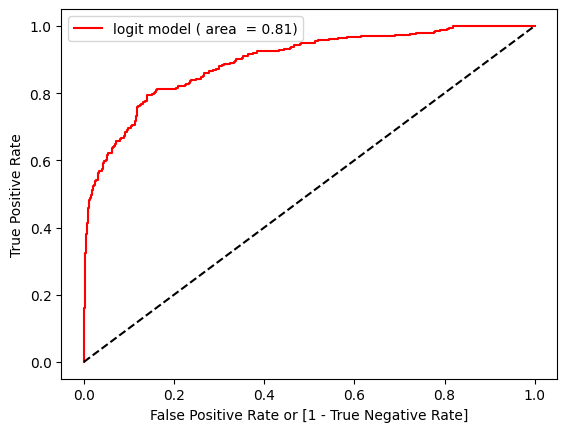

In [304]:
#Learning curve
from sklearn.metrics import auc,roc_curve,roc_auc_score
model=LogisticRegression()
model.fit(x,y)
y_scores = model.predict_proba(x)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


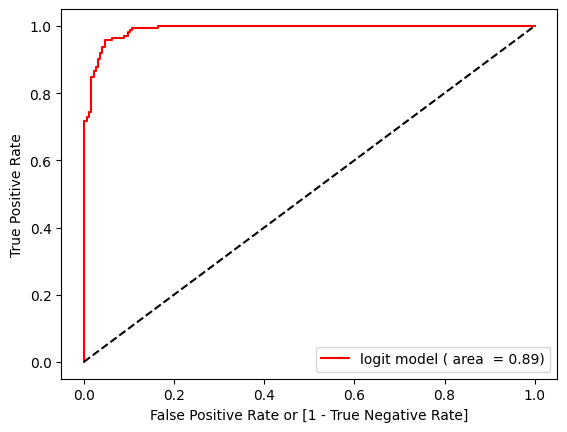

In [292]:
from sklearn.metrics import auc,roc_curve,roc_auc_score
model=LogisticRegression()
model.fit(x1,y1)
y1_scores = model.predict_proba(x1)[:, 1]
fpr, tpr, thresholds = roc_curve(y1, y1_scores)
auc = roc_auc_score(y1, y1_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()

In [293]:
auc

0.8909298688800673

In [300]:
df_coef=pd.DataFrame({'Features':x.columns,'Coefficients':df.coef_[0]})

In [301]:
df_coef

,Features,Coefficients
0,PassengerId,0.000370
1,Pclass,-0.885218
2,Age,-0.045649
3,SibSp,-0.096315
4,Parch,-0.647587
...,...,...
1725,Cabin_G6,-0.104390
1726,Cabin_T,-0.049750
1727,Embarked_C,1.066329
1728,Embarked_Q,0.149384


In [303]:
df1_coef=pd.DataFrame({'Features':x1.columns,'Coefficients':df1.coef_[0]})
df1_coef

,Features,Coefficients
0,PassengerId,0.001755
1,Pclass,-0.142738
2,Age,-0.003157
3,SibSp,-0.059119
4,Parch,-0.165062
...,...,...
863,Cabin_F4,-0.280190
864,Cabin_G6,-0.199815
865,Embarked_C,-0.801484
866,Embarked_Q,0.358975


In [305]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.8 MB/s eta 0:00:00


In [306]:
import streamlit as st

In [308]:
st.title('SurivedPeople in Titanic')

2024-10-22 20:49:37.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-22 20:49:37.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()